# Algerian Forest Fire Dataset


### Logistic Regression

In [480]:

import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skl
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [481]:
df = pd.read_csv("Algerian_forest_fires_dataset_UPDATE.csv",header=1)

In [482]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [483]:
df.drop([123,124],inplace=True)
df.drop(122,inplace=True)

In [484]:
df.reset_index(inplace=True)

In [485]:
df.drop('index',axis = 1,inplace=True)

In [486]:
df.columns = [col.strip() for col in df.columns]

In [487]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [488]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [489]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4   RH           244 non-null    object
 5   Ws           244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 26.8+ KB


In [490]:
df['Temperature'] = df['Temperature'].astype(int)
df['RH'] = df['RH'].astype(int)
df['Ws'] = df['Ws'].astype(int)
df['Rain'] = df['Rain'].astype(float)
df['FFMC'] = df['FFMC'].astype(float)
df['DMC'] = df['DMC'].astype(float)
df['DC'] = df['DC'].astype(float)
df['ISI'] = df['ISI'].astype(float)
df['BUI'] = df['BUI'].astype(float)
df['FWI'] = df['FWI'].astype(float)

In [491]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    object 
 1   month        244 non-null    object 
 2   year         244 non-null    object 
 3   Temperature  244 non-null    int32  
 4   RH           244 non-null    int32  
 5   Ws           244 non-null    int32  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      244 non-null    object 
dtypes: float64(7), int32(3), object(4)
memory usage: 24.0+ KB


In [492]:
df.describe()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,49.288115,4.759836,16.673361,7.049180
std,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,47.619662,4.154628,14.201648,7.428366
min,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000
25%,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,13.275000,1.400000,6.000000,0.700000
50%,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.100000,3.500000,12.450000,4.450000
75%,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,68.150000,7.300000,22.525000,11.375000
max,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000


In [493]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64

##### No missing value in the dataset

### Distribution of Data

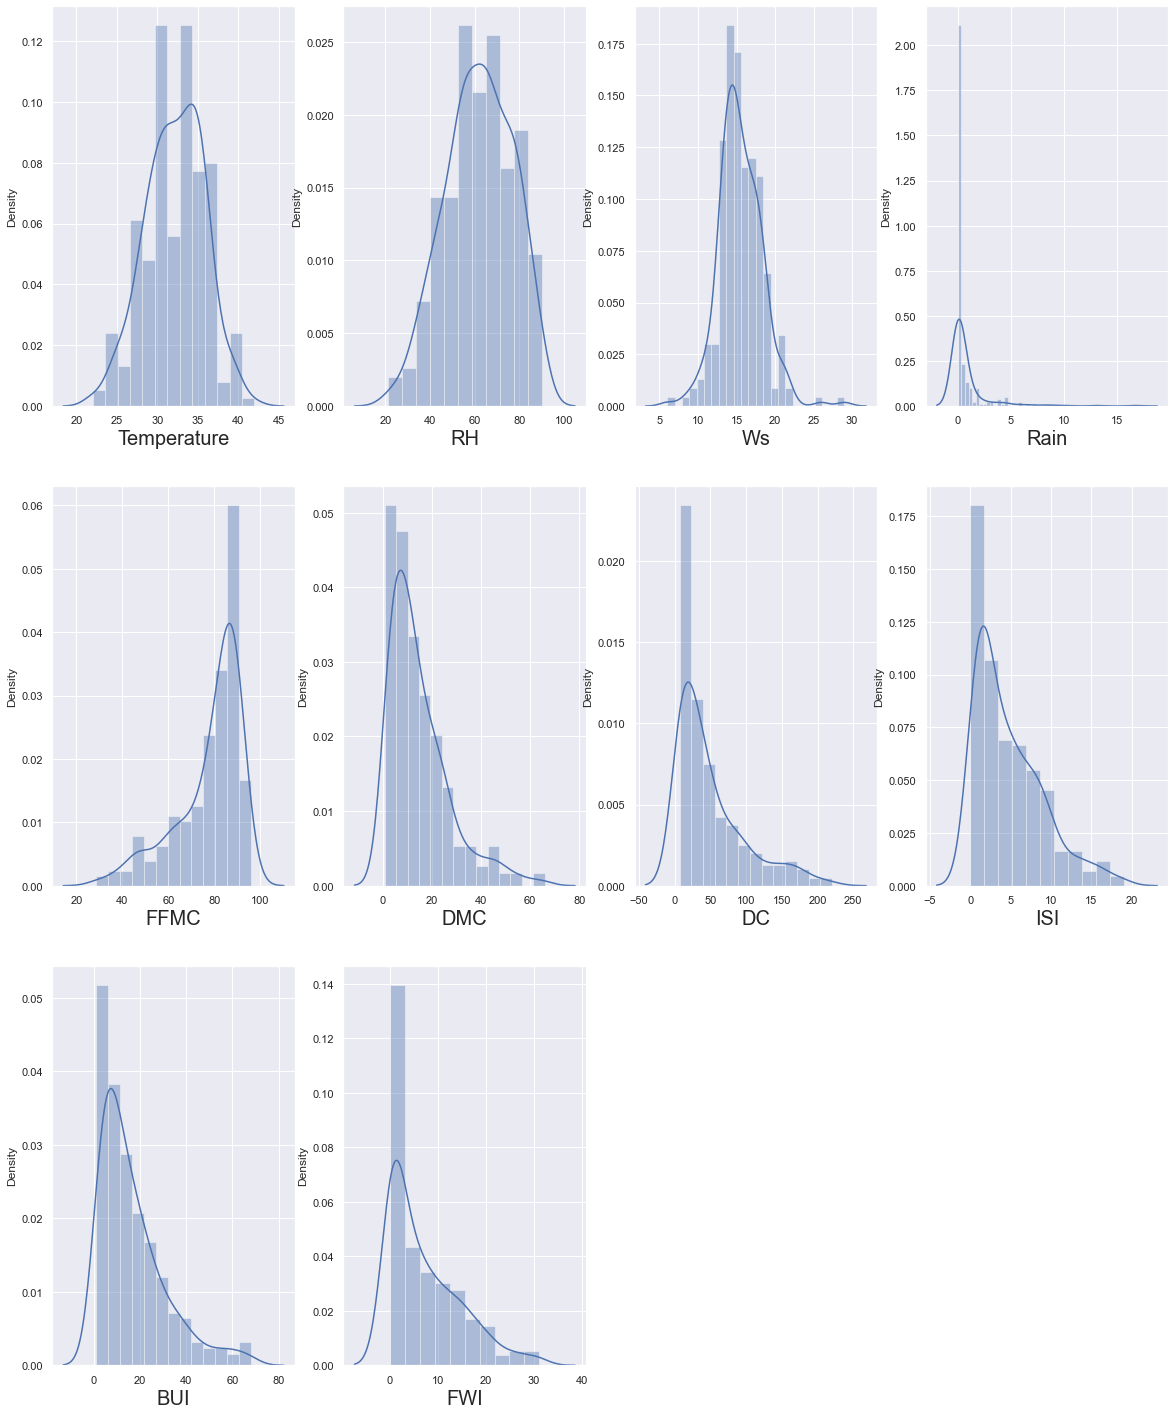

In [494]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df.iloc[:,3:]:
    if plotnumber<=10 :     # as there are 9 columns in the data
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

### Checking Outliers in data

<AxesSubplot:>

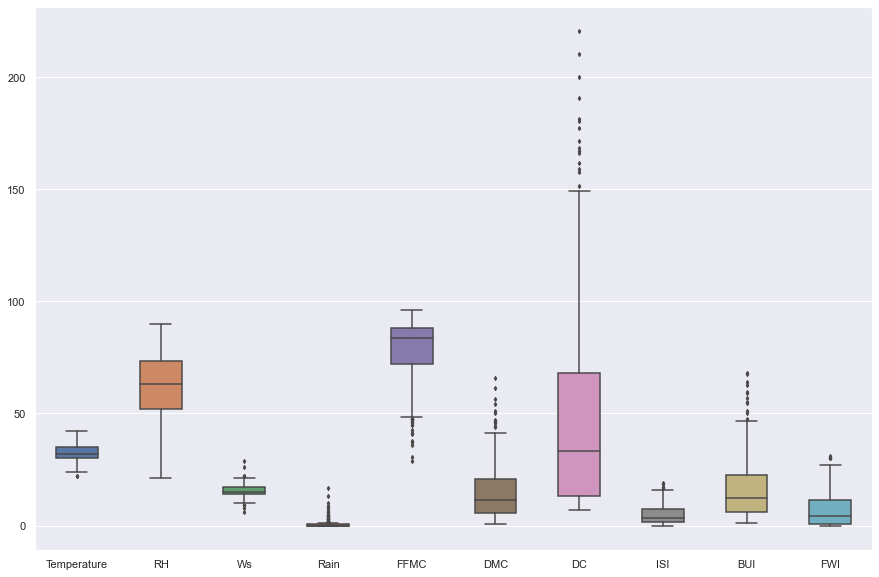

In [495]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df.iloc[:,3:], width= 0.5,ax=ax,  fliersize=3)

In [496]:
X = df.drop(columns = ['Classes'])
y = df['Classes'].str.strip()

In [497]:
X.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5


In [498]:
y.unique()

array(['not fire', 'fire'], dtype=object)

#### Before we fit our data to a model, let's visualize the relationship between our independent variables and the categories.

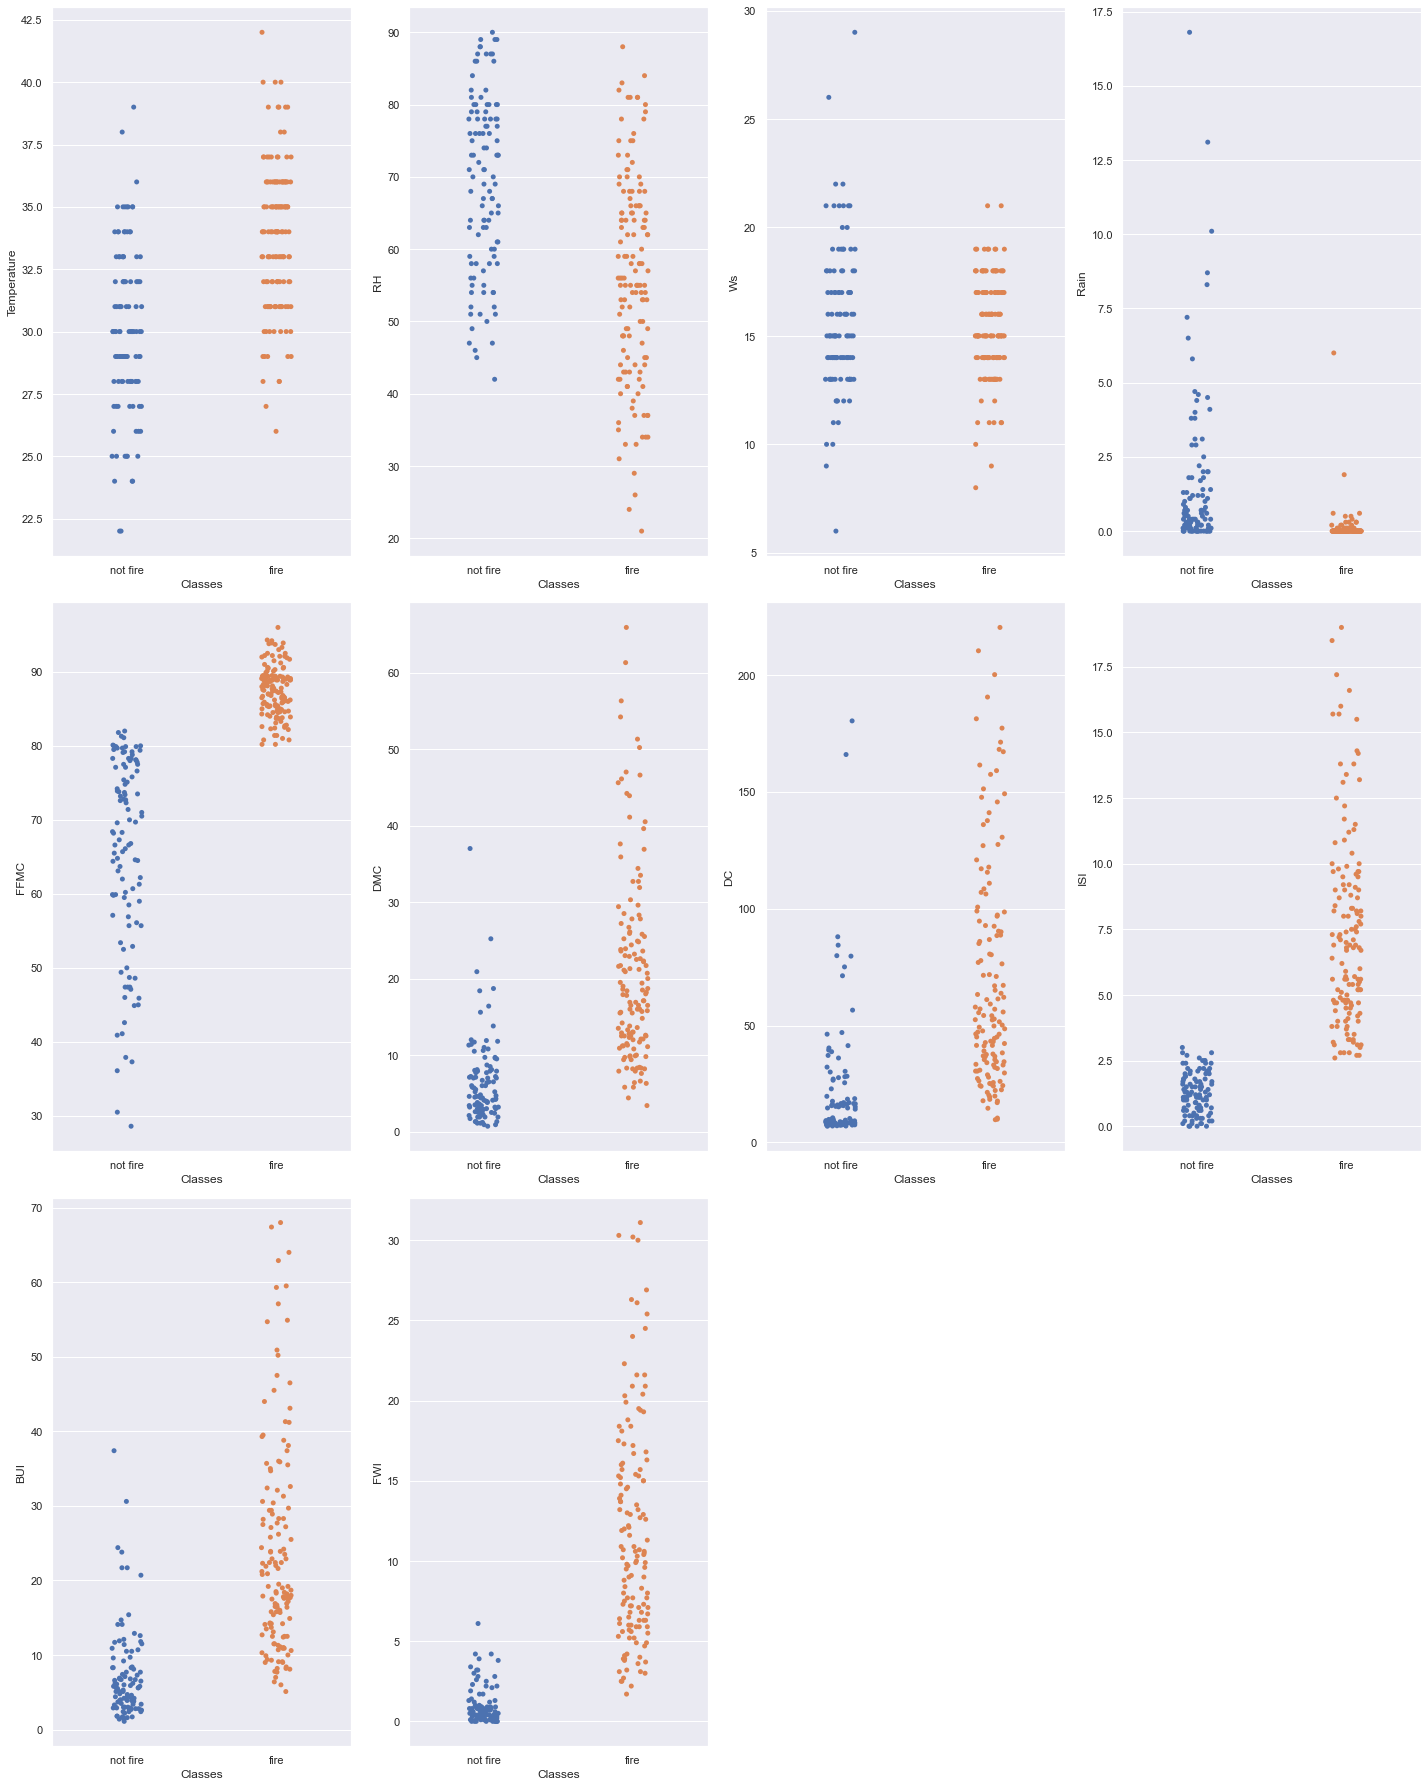

In [499]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X.iloc[:,3:]:
    if plotnumber<=10 :
        ax = plt.subplot(3,4,plotnumber)
        sns.stripplot(y,X[column])
    plotnumber+=1
plt.tight_layout()

#### we should scale our data. Let's use the standard scaler for that.

In [500]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [501]:
X_scaled

array([[-1.67527776, -1.35052592,  0.        , ..., -0.83447856,
        -0.93655635, -0.88345707],
       [-1.56173115, -1.35052592,  0.        , ..., -0.90683562,
        -0.9012768 , -0.89694665],
       [-1.44818455, -1.35052592,  0.        , ..., -1.07566876,
        -0.98594772, -0.9374154 ],
       ...,
       [ 1.39048054,  1.35052592,  0.        , ..., -1.05154974,
        -0.93655635, -0.92392582],
       [ 1.50402714,  1.35052592,  0.        , ..., -0.73800248,
        -0.81660589, -0.85647791],
       [ 1.61757374,  1.35052592,  0.        , ..., -0.85859758,
        -0.83777362, -0.88345707]])

#### let's split our data in test and training set.

In [502]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25, random_state = 320)

In [503]:
log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

LogisticRegression()

In [504]:
## MODEL SAVING OR PICKLING OUR MODEL
import pickle
# Writing different model files to file
with open( 'modelForPrediction.sav', 'wb') as f:
    pickle.dump(log_reg,f)
    
with open('sandardScalar.sav', 'wb') as f:
    pickle.dump(scalar,f)

#### Let's see how well our model performs on the test data set.


In [505]:
y_pred = log_reg.predict(x_test)

In [506]:
y_pred

array(['fire', 'not fire', 'fire', 'not fire', 'not fire', 'fire',
       'not fire', 'fire', 'not fire', 'fire', 'not fire', 'not fire',
       'fire', 'not fire', 'fire', 'fire', 'fire', 'not fire', 'not fire',
       'not fire', 'fire', 'not fire', 'fire', 'fire', 'not fire', 'fire',
       'not fire', 'not fire', 'not fire', 'fire', 'fire', 'fire', 'fire',
       'not fire', 'fire', 'fire', 'fire', 'fire', 'fire', 'fire', 'fire',
       'fire', 'not fire', 'fire', 'fire', 'not fire', 'fire', 'fire',
       'fire', 'fire', 'not fire', 'not fire', 'not fire', 'fire',
       'not fire', 'not fire', 'not fire', 'fire', 'fire', 'not fire',
       'fire'], dtype=object)

In [507]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9344262295081968

In [508]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[32,  1],
       [ 3, 25]], dtype=int64)

In [509]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [510]:
# Breaking down the formula for Accuracy
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.9344262295081968

In [511]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.9696969696969697

In [512]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.9142857142857143

In [513]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.9411764705882354